<img src="./pictures/logo-insa.png" style="float:right; max-width: 60px; display: inline" alt="INSA" /></a>


# Propellers estimation models with dimensional analysis and linear regressions

*Written by Marc Budinger, INSA Toulouse, France*

Propellers characteristics can be expressed by $C_T$ and $C_P$ coefficients. This coefficients are function of dimensions and conditions of use of propellers.  Dimensional analysis and linear regression of suppliers data can be used for the generation of $C_T$ and $C_P$ prediction models. 

*APC MR (Multi-Rotor) propellers*
<center>![Heatsink](pictures/apc-mr-props.jpg)</center>


## Dimensional analysis and $\pi$ numbers

The propeller performances can be expressed with 2 aerodynamic coefficients:
- The thrust: $T = C_{T} \rho n^2 D^4$  
- The power: $P = C_{P} \rho n^3 D^5 $

The [dimensional analysis]([https://web.mit.edu/16.unified/www/FALL/thermodynamics/notes/node86.html#SECTION06374000000000000000]) and especially the [Buckingham $\pi$ theorem](https://en.wikipedia.org/wiki/Buckingham_%CF%80_theorem) enable to find this results.


#### Dimensional analysis of the propeller thrust  

The thrust $T$ of a propeller depends of multiple parameters (geometrical dimensions, air properties, operational points):  
$T=f(\rho,n,D,pitch,V,\beta)$   
with the parameters express in the following table.

Parameter|M|L|T|
--|--|--|--
Thrust $T$ [N] | 1|1|-2
Mass volumic (Air) $\rho$ [kg/m$^3$]| 1 | -3 | 0|
Rotational speed $n$ [Hz] | 0 | 0 | -1|
Diameter $D$ [m] | 0| 1 | 0|
Pitch $Pitch$ [m] | 0 | 1 | 0|
Drone speed $V$ [m/s] | 0 | 1 | -1|
Air bulk modulus $\beta$ [m/s] | 1 | -1 | -2|
$=\pi_0$|  |  |  |
$=\pi_1$|  |  |  |
$=\pi_2$|  |  |  |
$=\pi_3$|  |  |  |


**Remark**: The dimension of a parameter $x$ is function of dimensions L,M and T : $[x]=M^aL^bT^c$.  The previous table gives the value of $a$, $b$ and $c$ for each parameter of the problem. 

> **Exercice**: Complete the table with 4 dimensionless $\pi$ numbers possible for the given problem. Explain the number of dimensionless number.


**Answer:**

Buckingham $\pi$ theorem: 7 parameters - 3 dimensions = 4 dimensionless $\pi$ numbers

Parameter|M|L|T|
--|--|--|--
Thrust $T$ [N] | 1|1|-2
Mass volumic (Air) $\rho$ [kg/m$^3$]| 1 | -3 | 0|
Rotational speed $n$ [Hz] | 0 | 0 | -1|
Diameter $D$ [m] | 0| 1 | 0|
Pitch $Pitch$ [m] | 0 | 1 | 0|
Drone speed $V$ [m/s] | 0 | 1 | -1|
Air bulk modulus $V$ [Pa] | 1 | -1 | -2|
$C_t=\frac{T}{\rho n^2D^4}=\pi_0$| 0 | 0 | 0 |
$\frac{Pitch}{D}=\pi_1$| 0 | 0 | 0 |
$J=\frac{V}{nD}=\pi_2$| 0 | 0 | 0 |
$\frac{\rho n^2D^2}{\beta}=\pi_3$| 0 | 0 | 0 |


#### Effect of the rotational speed  

APC suppliers give complete [propeller data](https://www.apcprop.com/technical-information/) for all their propellers. From the file *APC_STATIC-data-all-props.csv*, we find all static data provided by APC:

In [1]:
import pandas as pd

# Read the .csv file with bearing data
path='./data/'
df = pd.read_csv(path+'APC_STATIC-data-all-props.csv', sep=';')
# Print the head (first lines of the file)
df.head()

,LINE,COMP,TYPE,RPM,DIAMETER(IN),PITCH(IN),BLADE(nb),THRUST(LBF),POWER(HP),TORQUE(IN.LBF),Cp,Ct,AREA(m^2),THRUST(N),POWER(W),ANGLE,EFF,N.D
0,1,1,NaN,1000,10.5,4.5,2,0.03,0.01,0.02,0.03,0.08,0.06,0.1335,7.457,0.43,60.180222,10500.0
1,2,1,NaN,2000,10.5,4.5,2,0.13,0.01,0.08,0.03,0.08,0.06,0.5785,7.457,0.43,60.180222,21000.0
2,3,1,NaN,3000,10.5,4.5,2,0.29,0.01,0.17,0.03,0.08,0.06,1.2905,7.457,0.43,60.180222,31500.0
3,4,1,NaN,4000,10.5,4.5,2,0.52,0.02,0.30,0.03,0.08,0.06,2.3140,14.914,0.43,60.180222,42000.0
4,5,1,NaN,5000,10.5,4.5,2,0.81,0.04,0.47,0.03,0.08,0.06,3.6045,29.828,0.43,60.180222,52500.0


For next steps, we keep only the Multi-Rotor type propellers (MR). 

In [2]:
# Data Filtering
df_MR=df[df['TYPE']=='MR']
df_MR.head()

,LINE,COMP,TYPE,RPM,DIAMETER(IN),PITCH(IN),BLADE(nb),THRUST(LBF),POWER(HP),TORQUE(IN.LBF),Cp,Ct,AREA(m^2),THRUST(N),POWER(W),ANGLE,EFF,N.D
135,147,8,MR,2000,10.0,4.5,2,0.14,0.01,0.09,0.04,0.11,0.05,0.6230,7.457,0.45,72.772802,20000.0
146,148,8,MR,3000,10.0,4.5,2,0.32,0.01,0.20,0.04,0.11,0.05,1.4240,7.457,0.45,72.772802,30000.0
147,149,8,MR,4000,10.0,4.5,2,0.57,0.02,0.36,0.04,0.11,0.05,2.5365,14.914,0.45,72.772802,40000.0
148,150,8,MR,5000,10.0,4.5,2,0.90,0.04,0.56,0.04,0.11,0.05,4.0050,29.828,0.45,72.772802,50000.0
149,151,8,MR,6000,10.0,4.5,2,1.29,0.08,0.79,0.04,0.11,0.05,5.7405,59.656,0.45,72.772802,60000.0


We plot the $C_p$ and $C_t$ for the a 10x4.5 propeller (COMP n° 8 in the previous table). We can notice that these coefficients are constant up to a certain value of speed of rotation. The manufacturer recommends using these propellers for a product speed of rotation x diameter less than a limit (depending on the type of propeller technology) and given [here](https://www.apcprop.com/technical-information/rpm-limits/):  
Maximum speed(RPM) x prop diameter (inches) = 105,000  
for MR type which gives a blade tip speed of 135 m/s. The dark spots on the following diagram correspond to this non-recommended operating zone.

> **Question:** Explain the origin of this operating limit comes from and the $\pi$ number that can express it.


**Answer:**

The $\frac{\rho n^2D^2}{\beta}$ dimensionless number is similar to Mach number $M_a=V/c$ with $c=\sqrt{\frac{\beta}{\rho}}$ the speed of sound:  
$$\frac{\rho n^2D^2}{\beta}=M_a^2$$


In [3]:
# Keep only the component n°8
df_8=df_MR[df_MR['COMP']==8]

# Extract forbidden ND product
df_8_ND=df_8[df_8['N.D']>105000]

import numpy as np
import matplotlib.pyplot as plt
# plot the data 
plt.plot(df_8['RPM'],df_8['Cp'], 'bo',df_8['RPM'],df_8['Ct'], 'ro',)
plt.plot(df_8_ND['RPM'],df_8_ND['Cp'], 'ko',df_8_ND['RPM'],df_8_ND['Ct'], 'ko',)
plt.xlabel('Rotational Speed [RPM]')
plt.ylabel('Cp (blue) and Ct (red)')
plt.grid()
plt.show()

<Figure size 640x480 with 1 Axes>

## Linear regression

For next calculations, we keep only data with following criteria:
-  Type 'MR' (Multi-Rotor)    
-  Maximum RPM < 105,000/prop diameter (inches)

In [4]:
# Keep only operating points with ND<105000
df_MR_ND=df_MR[df_MR['N.D']<105000]

The APC static data correspond to the hover operational point where the speed V=0. The aerodynamic coefficients are thus only a function of $Pitch/D$ (called 'ANGLE' in the .csv file) dimensionless number.

$C_t=\frac{T}{\rho N^2 D^3}=f(\frac{Pitch}{D})$  
$C_p=\frac{P}{\rho N^3 D^5}=g(\frac{Pitch}{D})$  

The following code uses the [StatsModels](https://www.statsmodels.org/stable/index.html) package in order to set up a $C_t$ estimator for the static case ($V=0$ or $J=0$).

Parameters:  [0.04268687 0.14377908]
R2:  0.8950315895208383


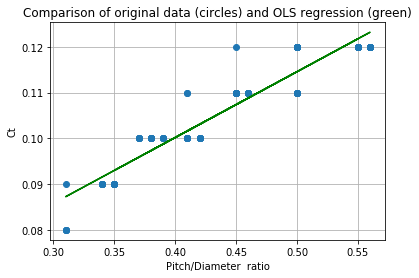

Ct estimation model : Ct=4.27e-02 + 1.44e-01 * Pitch/D 


In [5]:
# Determination of the least squares estimator with the OLS function 
# of the SatsModels package

import statsmodels.api as sm

# Data
x=df_MR_ND['ANGLE'].values
y_Ct=df_MR_ND['Ct'].values
y_Cp=df_MR_ND['Cp'].values


# Matrix X and Y
X=np.concatenate((np.ones(np.size(x)).reshape(np.size(x),1),x.reshape(np.size(x),1)), axis=1)

Y_Ct=y_Ct.reshape((np.size(x),1))
Y_Cp=y_Cp.reshape((np.size(x),1))

# OLS regression
model_Ct = sm.OLS(Y_Ct, X)
model_Cp = sm.OLS(Y_Cp, X)

result_Ct = model_Ct.fit()
result_Cp = model_Cp.fit()

# Ct Parameters 
# ----
print('Parameters: ', result_Ct.params)
print('R2: ', result_Ct.rsquared)

# Y vector prediction
Ct_OLS=result_Ct.predict(X)

# plot the data 
plt.plot(x,y_Ct, 'o',x,Ct_OLS, '-g')
plt.xlabel('Pitch/Diameter  ratio')
plt.ylabel('Ct')
plt.title('Comparison of original data (circles) and OLS regression (green)')
plt.grid()
plt.show()

print("Ct estimation model : Ct=%.2e + %.2e * Pitch/D "%(result_Ct.params[0],result_Ct.params[1]))



> **Exercice**: Produce an OLS (Ordinary Least Square) regression of $C_p$ data. 

Parameters:  [-0.00147773  0.09718302]
R2:  0.7983614111956401


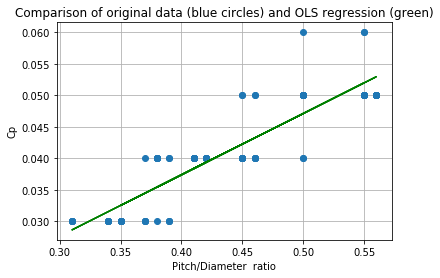

Cp estimation model : Cp=-1.48e-03 + 9.72e-02 * Pitch/D 


In [6]:
y_Cp=df_MR_ND['Cp'].values
model_Cp = sm.OLS(Y_Cp, X)

# Cp Parameters 
# -----
print('Parameters: ', result_Cp.params)
print('R2: ', result_Cp.rsquared)

# Y vector prediction
Cp_OLS=result_Cp.predict(X)

# plot the data 
plt.plot(x,y_Cp, 'o',x,Cp_OLS, '-g')
plt.xlabel('Pitch/Diameter  ratio')
plt.ylabel('Cp')
plt.title('Comparison of original data (blue circles) and OLS regression (green)')
plt.grid()
plt.show()

print("Cp estimation model : Cp=%.2e + %.2e * Pitch/D "%(result_Cp.params[0],result_Cp.params[1]))